<h1 align=center> Computer Vision: Assignment 2 </h1>

| [<img src="https://avatars0.githubusercontent.com/u/18689888" width="150px;" height="150px;"/><br /><sub><b>Amr M. Kayid</b></sub>](https://github.com/AmrMKayid)| [<img src="https://avatars2.githubusercontent.com/u/15708438" width="150px;" height="150px;"/><br /><sub><b>Abdullah ELkady</b></sub>](https://github.com/AbdullahKady) |
| :---: | :---: | 
| **37-15594** | **37-16401** |
| **T10** | **T10** |

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

import math
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.cm as cm
import sys
import pylab
from matplotlib.widgets import Slider

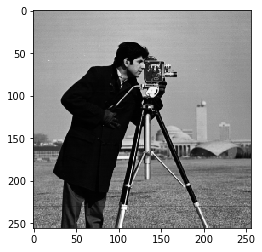

In [3]:
cameraman_img = Image.open("Cameraman.tif")
plt.imshow(cameraman_img, cmap="gray")

# Problem 1


Implement a function to compute the **Laplacian of Gaussian (LoG) kernel** given the value of sigma (𝜎). 

Deliverables:
- Your code.
- The output edge image for 𝜎 = 2, 𝜎 = 3 and 𝜎 = 4. Name the edge images “LoG_2.jpg”, “Log_3.jpg” and “Log_4.jpg”. The treshold for all cases should be set to 0.1.

First, you are asked to compute the size of the kernel as per the following equation:
\begin{equation}
s=2 \times\lceil 3 \times \sigma\rceil+ 1
\end{equation}

In [4]:
def compute_kernel_size(sigma: str) -> int:
    return int((2 * np.ceil(3 * sigma)) + 1)

Given the size of the kernel (𝑠 × 𝑠), implement a function to compute the values inside as per the following function ([0,0] is the middle cell):
\begin{equation}
\operatorname{LoG}(x, y)=\frac{-1}{\pi \sigma^{4}}\left(1-\frac{x^{2}+y^{2}}{2 \sigma^{2}}\right) e^{-\frac{x^{2}+y^{2}}{2 \sigma^{2}}}
\end{equation}

In [5]:
def log_(x: float, y: float, sigma: float) -> float:
    n1 = (-1. / (math.pi * sigma**4))
    common = (x**2 + y**2) / (2 * sigma**2)
    n2 = (1. - common)
    n3 = math.exp(-common)
    return n1 * n2 * n3

In [6]:
range_ = lambda start, end: range(start, end+1)

In [7]:
def compute_log_mask(sigma: float) -> np.ndarray:
    mask_width = compute_kernel_size(sigma)
    
    log_mask = []
    w_range = int(math.floor(mask_width / 2.))
    print('Going from {} to range {}'.format(-w_range, w_range))
    for x in range_(-w_range, w_range):
        for y in range_(-w_range, w_range):
            log_mask.append(log_(x, y, sigma))
            
    log_mask = np.array(log_mask)
    log_mask = log_mask.reshape(mask_width, mask_width)
    return log_mask

In [15]:
def convolve(image, mask):
    image = np.array(image)
    width = image.shape[1]
    height = image.shape[0]
    w_range = int(math.floor(mask.shape[0] / 2.))
    
    new_image = np.zeros((height, width))

    for i in range(w_range, width-w_range):
        for j in range(w_range, height-w_range):
            for k in range_(-w_range, w_range):
                for h in range_(-w_range,w_range):
                    new_image[j, i] += mask[w_range + h,w_range+k] * image[j + h, i + k]
    return new_image

In [10]:
def prewitt(image):
    vertical = np.array([[-1, 0, 1], 
                         [-1, 0, 1],
                         [-1 ,0, 1]])
    horizontal = np.array([[-1, -1, -1], 
                         [0, 0, 0],
                         [1 ,1, 1]])
    vertical_image = convolve(image, vertical)    
    horizontal_image = convolve(image, horizontal)    
    gradient_magnitude = np.sqrt(vertical_image**2 + horizontal_image**2)
    
    return gradient_magnitude

In [11]:
def normalize(image, min_val, max_val):
    min_ = np.min(image)
    max_ = np.max(image)
    normalized = ((image - min_) / (max_ - min_)) * (max_val - min_val) + min_val
    return normalized

In [56]:
def run_log_edge_detection(image, sigma, threshold):
    image = np.array(image)
    
    print("creating mask")
    log_mask = compute_log_mask(sigma)
    
    print("smoothing the image by convolving with the log_ mask")
    log_image = convolve(image, log_mask)

    normalized_image = normalize(log_image, 0, 255)
    
    prewitt_image = prewitt(normalized_image)
    plt.imshow(prewitt_image, cmap = 'gray')
    
    final_image = np.where((prewitt_image > threshold * 255), 255, 0)
    plt.imshow(final_image, cmap = 'gray')
    final_image = np.array(final_image)
    plt.imshow(final_image, cmap = 'gray')

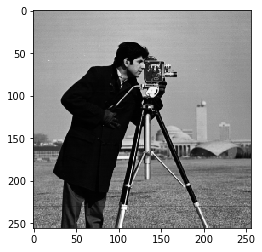

In [57]:
cameraman_img = Image.open("Cameraman.tif")
plt.imshow(cameraman_img, cmap="gray")

creating mask
Going from -6 to range 6
smoothing the image by convolving with the log_ mask


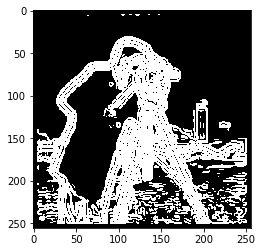

In [58]:
run_log_edge_detection(cameraman_img, 2, 0.1)

creating mask
Going from -9 to range 9
smoothing the image by convolving with the log_ mask


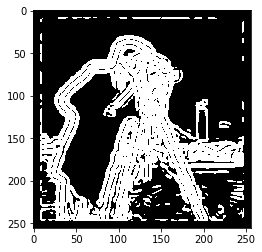

In [59]:
run_log_edge_detection(cameraman_img, 3, 0.1)

creating mask
Going from -12 to range 12
smoothing the image by convolving with the log_ mask


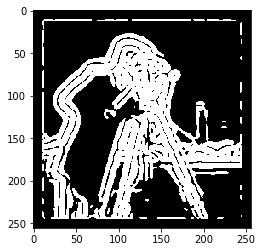

In [60]:
run_log_edge_detection(cameraman_img, 4, 0.1)

# Problem 2


Implement a function to sharpen a gray-scale image as per the discussion provided in the tutorial. As a possible kernel for edge detection, consider the kernel provided below. Apply your function to the image “cameraman.tif”.

\begin{equation}
M=\left[\begin{array}{ccc}{-1} & {-1} & {-1} \\ {-1} & {8} & {-1} \\ {-1} & {-1} & {-1}\end{array}\right]
\end{equation}

Deliverables:
- Your code.
- The sharpened output image. Name the image “Sharpened.jpg”

In [21]:
def apply_sharpening_kernel(image, row, col):
    """
    -1  -1  -1
    -1   8  -1
    -1  -1  -1
    """
    # Is this some terrible code? YES IT IS!
    new_value = 0

    new_value += -1 * image[row-1][col-1]
    new_value += -1 * image[row-1][col]
    new_value += -1 * image[row][col-1]

    new_value += 8 * image[row][col]

    new_value += -1 * image[row+1][col]
    new_value += -1 * image[row][col+1]
    new_value += -1 * image[row+1][col+1]

    return new_value

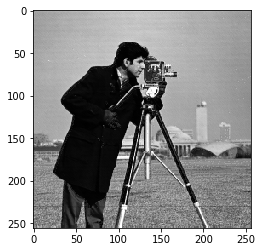

In [22]:
original_image = np.array(cameraman_img)
sharpening_layer = np.copy(original_image)
padded_image = np.pad(original_image, pad_width=1)

# A simple convolution, with zero padding.
for r, row in enumerate(original_image):
    for c, _ in enumerate(row):
        sharpening_layer[r][c] = apply_sharpening_kernel(padded_image, r, c)

output_sharpened = 0.1 * sharpening_layer + original_image
# Apply threshold so that the ranges stay within 0-255
output_sharpened[output_sharpened > 255] = 255
output_sharpened[output_sharpened < 0] = 0

plt.imshow(output_sharpened, cmap=cm.gray)